<a href="https://colab.research.google.com/github/Mayankjh/Classifications_deeplearning/blob/master/ChestXray_Penumonia_(All_ResNet_Models_With_SGD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("drive/My Drive/chest_xray1"))

from os import listdir, makedirs
from os.path import join, exists, expanduser
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.inception_v3 import InceptionV3
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from keras.utils.data_utils import Sequence
import sys
from PIL import *
sys.modules['Image'] = Image 
print(os.listdir("drive/My Drive/chest_xray1/train"))

['test', 'train', 'val', '.ipynb_checkpoints']
['NORMAL', 'PNEUMONIA']


In [0]:
img_width, img_height = 224,224
train_data = 'drive/My Drive/chest_xray1/train'
test_data = 'drive/My Drive/chest_xray1/test'
val_data = 'drive/My Drive/chest_xray1/val'

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

Found 5226 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


# ResNet50

In [0]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


In [14]:
result = model.output
result = Dense(512, activation='relu')(result)
result = Dense(256, activation='relu')(result)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
predictions = Dense(2, activation='sigmoid')(result)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [15]:
inception_transfer = Model(inputs=model.input, outputs=predictions)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(filepath='Penumonia_detector_checkpoint.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

inception_transfer.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=30, shuffle = True, verbose = 1, validation_data = test_generator, callbacks=[checkpoint, lr_reduce])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
164/164 [==============================] - 1865s 11s/step - loss: 0.6499 - acc: 0.7414 - val_loss: 0.6637 - val_acc: 0.6219
Epoch 2/30
164/164 [==============================] - 171s 1s/step - loss: 0.5937 - acc: 0.7413 - val_loss: 0.6635 - val_acc: 0.6219
Epoch 3/30
164/164 [==============================] - 176s 1s/step - loss: 0.5708 - acc: 0.7405 - val_loss: 0.6749 - val_acc: 0.6219
Epoch 4/30
164/164 [==============================] - 176s 1s/step - loss: 0.5430 - acc: 0.7405 - val_loss: 0.6516 - val_acc: 0.6219
Epoch 5/30
164/164 [==============================] - 176s 1s/step - loss: 0.4697 - acc: 0.7413 - val_loss: 0.7034 - val_acc: 0.6219
Epoch 6/30
164/164 [==============================] - 177s 1s/step - loss: 0.3746 - acc: 0.7417 - val_loss: 0.4540 - val_acc: 0.6219
Epoch 7/30
164/164 [==============================] - 176s 1s/step - loss: 0.2781 - acc: 0.9354 - val_

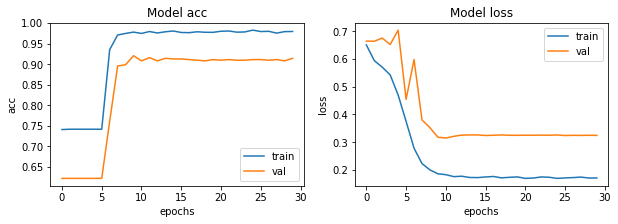

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history_pretrained.history[met])
    ax[i].plot(history_pretrained.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# ResNet101

In [6]:
from keras.applications import ResNet101
model = ResNet101(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
result = model.output
result = Dense(512, activation='relu')(result)
result = Dense(256, activation='relu')(result)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
predictions = Dense(2, activation='sigmoid')(result)

inception_transfer = Model(inputs=model.input, outputs=predictions)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(filepath='Penumonia_detector_checkpoint.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

inception_transfer.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
inception_transfer.summary()
history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=30, shuffle = True, verbose = 1, validation_data = test_generator, callbacks=[checkpoint, lr_reduce])
#graphs


























179650560/179648224 [==============================] - 2s 0us/step




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]               

NameError: ignored

NameError: ignored

NameError: ignored

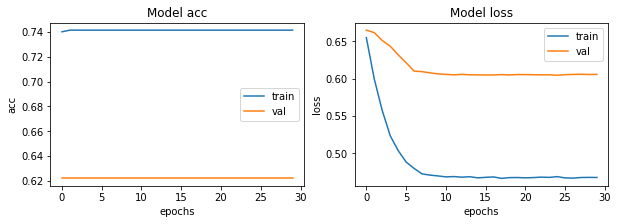

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history_pretrained.history[met])
    ax[i].plot(history_pretrained.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# ResNet152

242900992/242900224 [==============================] - 4s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

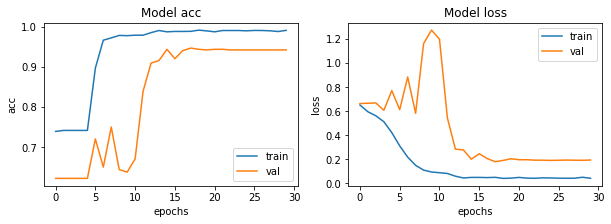

In [8]:
from keras.applications import ResNet152
model = ResNet152(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
result = model.output
result = Dense(512, activation='relu')(result)
result = Dense(256, activation='relu')(result)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
predictions = Dense(2, activation='sigmoid')(result)
inception_transfer = Model(inputs=model.input, outputs=predictions)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(filepath='Penumonia_detector_checkpoint.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

inception_transfer.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
inception_transfer.summary()

history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=30, shuffle = True, verbose = 1, validation_data = test_generator, callbacks=[checkpoint, lr_reduce])
#graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history_pretrained.history[met])
    ax[i].plot(history_pretrained.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
